In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, impulse

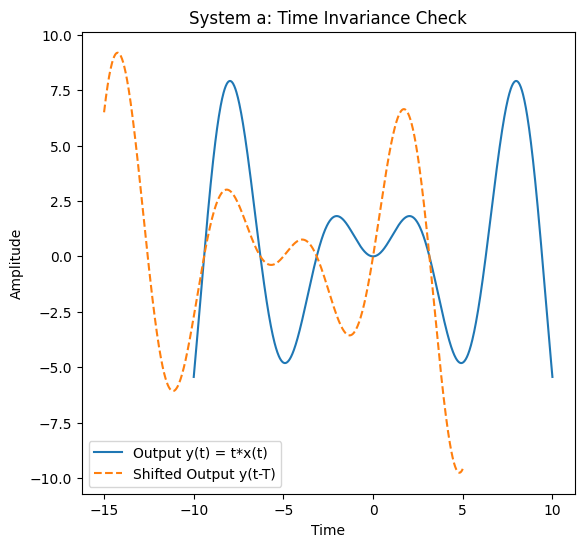

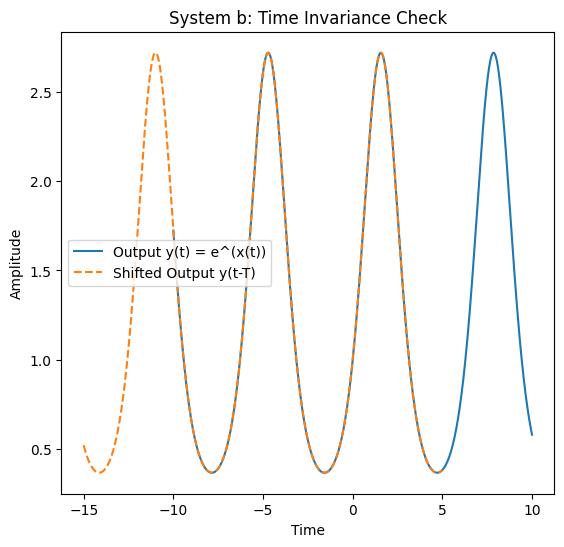

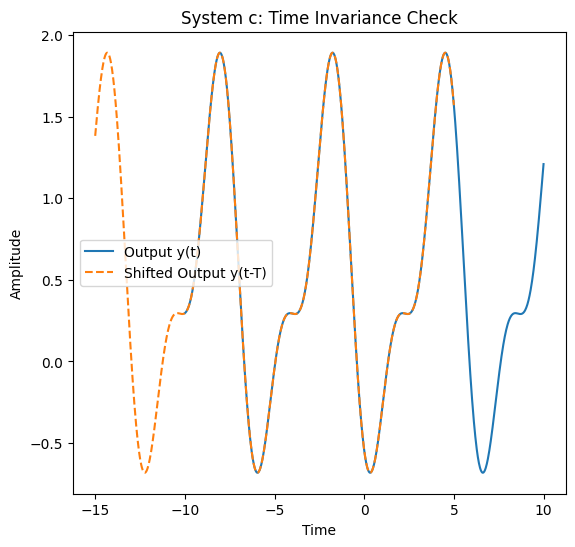

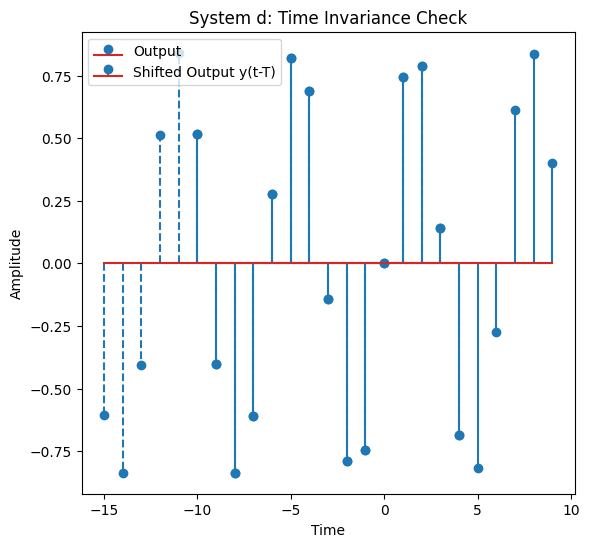

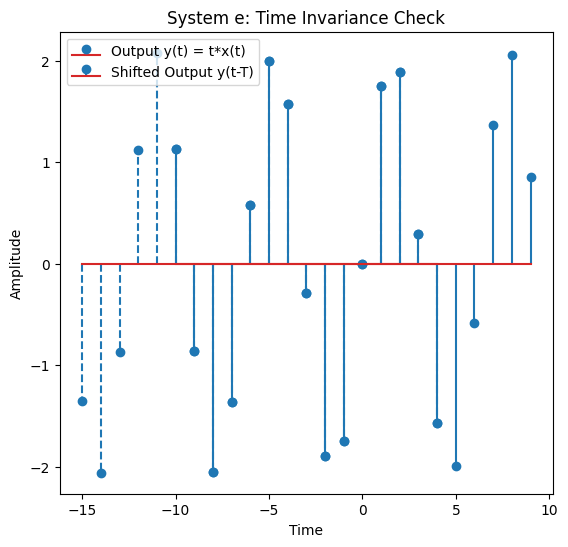

In [6]:
def system_output_a(x_t):
    return t*x_t

t = np.linspace(-10, 10, 1000)
T = 5
x_t = np.sin(t)
x_t_shifted = np.sin(t - T)
y_t = system_output_a(x_t)
y_t_shifted = system_output_a(x_t_shifted)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(t, y_t, label='Output y(t) = t*x(t)')
plt.plot(t - T, y_t_shifted, '--', label='Shifted Output y(t-T)')
plt.title('System a: Time Invariance Check')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

def system_output_b(x_t):
    return np.exp(x_t)

x_t_shifted = np.sin(t - T)
y_t = system_output_b(x_t)
y_t_shifted = system_output_b(x_t_shifted)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(t, y_t, label='Output y(t) = e^(x(t))')
plt.plot(t - T, y_t_shifted, '--', label='Shifted Output y(t-T)')
plt.title('System b: Time Invariance Check')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

def system_output_c(x_t, x_t_squared):
    return x_t + x_t_squared

x_t_shifted = np.sin(t + 10 - T)
x_t_squared = np.sin(t)**2
x_t_squared_shifted = np.sin(t - T)**2
y_t = system_output_c(np.sin(t + 10), x_t_squared)
y_t_shifted = system_output_c(x_t_shifted, x_t_squared_shifted)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(t, y_t, label='Output y(t)')
plt.plot(t - T, y_t_shifted, '--', label='Shifted Output y(t-T)')
plt.title('System c: Time Invariance Check')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

t=np.arange(-10,10,1)

def system_output_d(x_n):
    return np.sin(x_n)

T = 5
x_t = np.sin(t)
x_t_shifted = np.sin(t - T)
y_t = system_output_d(x_t)
y_t_shifted = system_output_d(x_t_shifted)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.stem(t, y_t, label='Output')
plt.stem(t - T, y_t_shifted, '--', label='Shifted Output y(t-T)')
plt.title('System d: Time Invariance Check')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

#e
T = 5
x_t = np.sin(t)
x_t_shifted = np.sin(t - T)
y_t = np.sin(t)+np.sin(t-1)+np.sin(t+1)
y_t_shifted = np.sin(t-T)+np.sin(t-1-T)+np.sin(t+1-T)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.stem(t, y_t, label='Output')
plt.stem(t - T, y_t_shifted, '--', label='Shifted Output y(t-T)')
plt.title('System e: Time Invariance Check')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

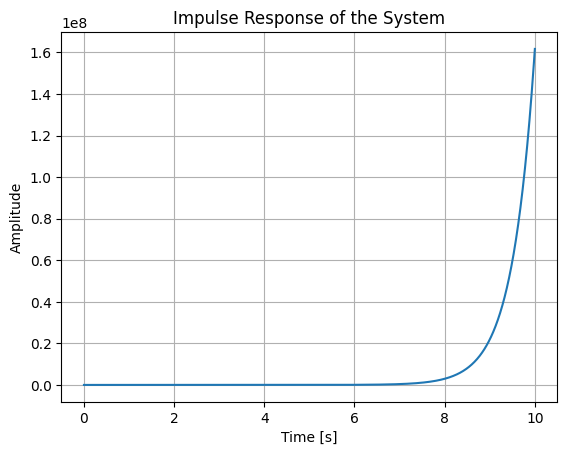

The system is unstable.


In [3]:

#2
numerator = [1]  # Coefficients for x(t)
denominator = [1, -1, -2]  # Coefficients for y''(t), y'(t), y(t)

system = lti(numerator, denominator)
t = np.linspace(0, 10, 1000)
t, h = impulse(system, T=t)

plt.plot(t, h)
plt.title('Impulse Response of the System')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

poles = system.poles
is_stable = all(p.real < 0 for p in poles)

print(f"The system is {'stable' if is_stable else 'unstable'}.")

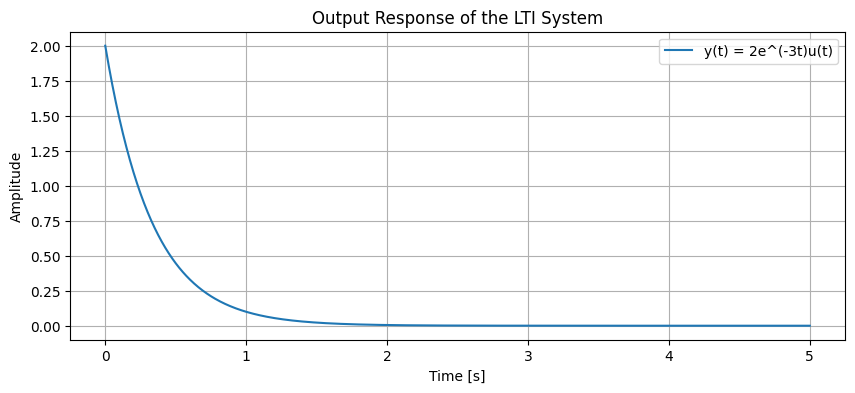

In [4]:
#3
t = np.linspace(0, 5, 1000)

# Define the output response y(t)
y_t = 2 * np.exp(-3 * t)

# Plot the graph
plt.figure(figsize=(10, 4))
plt.plot(t, y_t, label='y(t) = 2e^(-3t)u(t)')
plt.title('Output Response of the LTI System')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

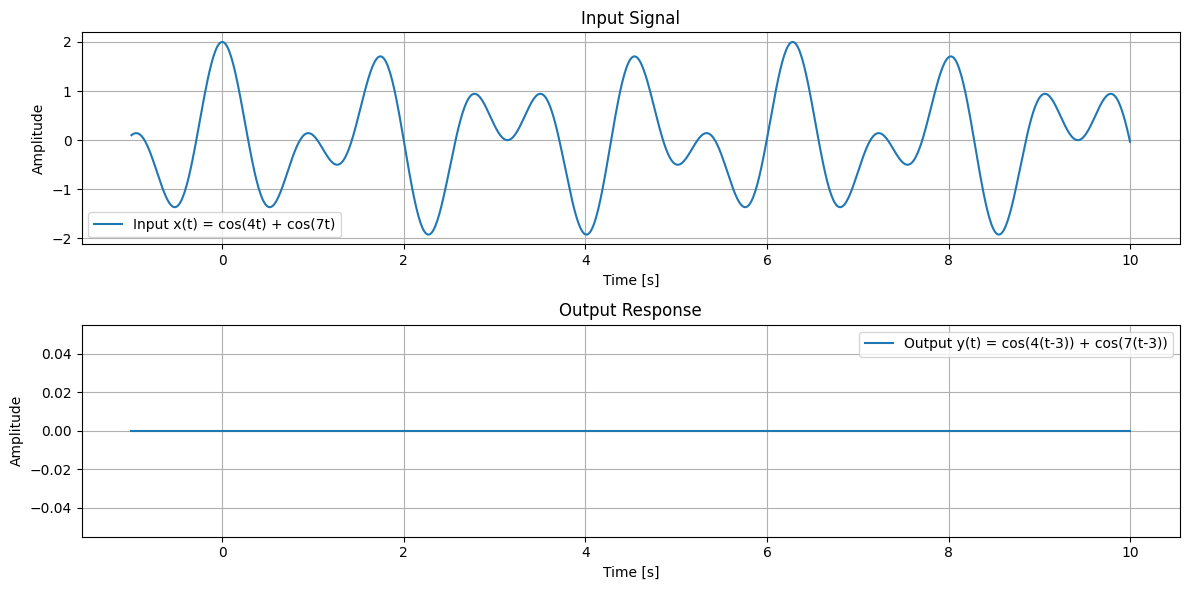

In [5]:
#4
t = np.linspace(-1, 10, 1000)
# Define the input signal x(t)
x_t = np.cos(4*t) + np.cos(7*t)
def h(t):
    if t==3:
        return 1
    else:
        return 0
    
h_t=np.array([h(i) for i in t])
# Plot the graph
plt.figure(figsize=(12, 6))

# Plot the input signal
plt.subplot(2, 1, 1)
plt.plot(t, x_t, label='Input x(t) = cos(4t) + cos(7t)')
plt.title('Input Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Plot the output signal
plt.subplot(2, 1, 2)
plt.plot(t, np.convolve(x_t,h_t,'same'), label='Output y(t) = cos(4(t-3)) + cos(7(t-3))')
plt.title('Output Response')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()